# Welcome to the Titanic dataset analysis!

Here we are going to discover the Titanic's dataset and we will answer to some interesting questions. The data set was downloaded from the Kaggle platform.
For more information about the data set visit the following link: https://www.kaggle.com/c/titanic/data


### We are going to answer some basic questions in order to give a good insight of our dataset.

**First some basic questions:**

1. Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passengers come from?
4. Who was alone and who was with family?

**Then we'll dig deeper, with a broader question:**

5. What factors helped someone survive the sinking?
6. Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
7. Did having a family member increase the odds of surviving the crash?


### Data Dictionary:
The following table define every variable of the Titanic dataset.

<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td>Decks levels=[A, B, C, D, E, F, G, T]</td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>

#### Imports 
Import pandas and numpy 

In [66]:
# Basic imports
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

Import seaborn, matplotlib, matplotlib inline

In [67]:
# Imports for the visualization
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# set the background style for all the plots
sns.set_style('darkgrid')

# to visualize the plots
%matplotlib inline

Read the file 'titanic_train.csv'

In [68]:
# read df
titanic_df = pd.read_csv('../../Data/titanic.csv')

In [69]:
# show df
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Get info from your dataset

In [70]:
# show info
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Get summary statistic of the dataset

In [71]:
# show statistics
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Here we start to aswer to our questions

### 1)  Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

#### 1.1 Plot the number of passengers by sex. 

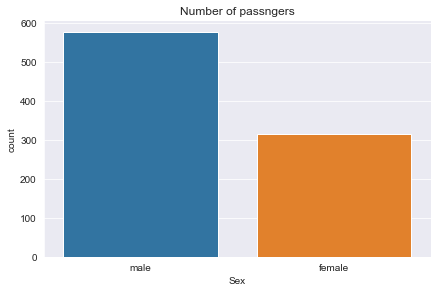

In [72]:
#We discover how were divided male and female

# plt function
sns.catplot(data= titanic_df, x='Sex', kind='count', height=4, aspect=1.5)

# plot title
plt.title('Number of passngers')
plt.show()

#### 1.2 Plot the age of the passngers by sex.

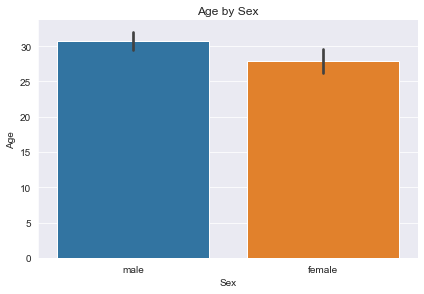

In [73]:
# We analyze the mean of the age between male and female
sns.catplot(x='Sex', y='Age', data= titanic_df, kind='bar', height=4, aspect=1.5)

# title
plt.title('Age by Sex')
plt.show()

#### 1.3 Plot the number of passengers for every Class ('Pclass') divided by sex
**Hint:** Use the 'hue' parameter.

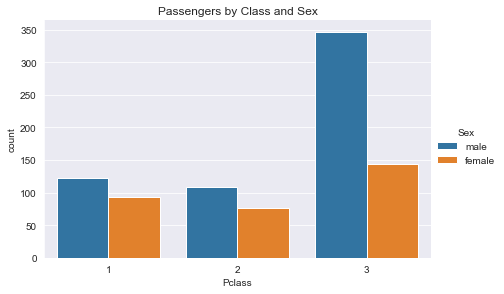

In [74]:
# set the plot function
sns.catplot(x='Pclass', data= titanic_df, kind='count', hue='Sex', height=4, aspect=1.5)

# set the title
plt.title('Passengers by Class and Sex')

plt.show()

### Now let's discover about the childrend on shipboard.

For this porpose I consider a child every person under 16. To extrapolate this new information we create a costumed function that creates a new column **(Person)** on our dataset.

In [75]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [76]:
# In this case i consider a child every person under 16

# First let's make a function to sort through the sex 
def Male_Female_Child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex

In [77]:
# I create a new column where to apply the finction
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(Male_Female_Child, axis=1)

In [78]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Now that we have divided male, female and childrend let's do some visualization.

#### 1.4 Plot again the number of passengers for every Class ('Pclass') divided by sex
This time must be included the child!

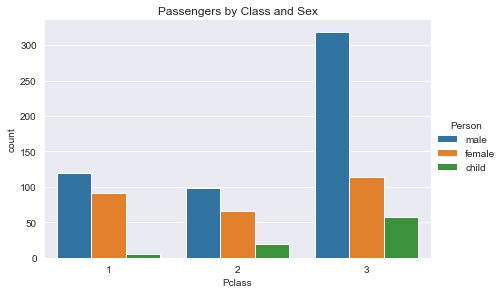

In [79]:
# plot function
sns.catplot('Pclass', data =titanic_df, kind='count', hue='Person', height=4, aspect=1.5)

# title
plt.title("Passengers by Class and Sex")

# show
plt.show()

#### 1.5 Plot the age distribution of all the passengers

**Hint:** Before you do the plot, drop the NaN values from the "Age" variable.

In [80]:
age = titanic_df.Age.dropna()

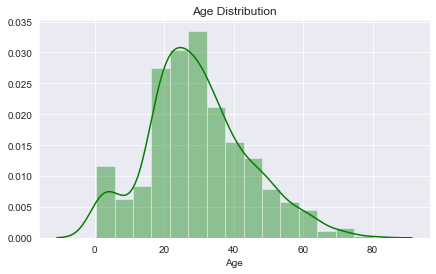

In [81]:
# set the fig size
plt.figure(figsize=(7,4))

# plot function
sns.distplot(age, bins=15, color='green')

# plot title
plt.title("Age Distribution")

# show
plt.show()

In [82]:
#For a better insight
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

#### 1.6 Plot the age  distribution by "Sex"

**Hint:** Use the FacetGrid function. hue = "Sex"

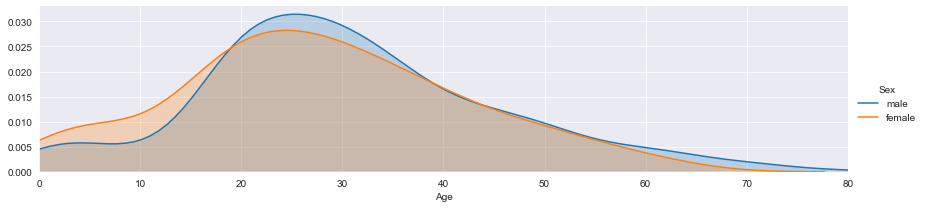

In [83]:
# Setting of the facegrid
fig= sns.FacetGrid(titanic_df, hue='Sex', aspect=4, xlim=(0, titanic_df['Age'].max()))
fig
# Mapping the values to plot
fig.map(sns.kdeplot, 'Age', shade=True)

# Adding the legend
fig.add_legend()

# plot title
plt
plt.show()

#### 1.7 Plot the age distribution by sex, this time add the child values

**Hint:** Change the hue

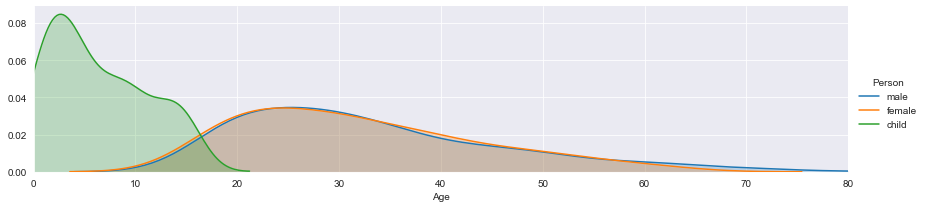

In [84]:
# Setting of the facegrid
fig= sns.FacetGrid(titanic_df, hue='Person', aspect=4, xlim=(0, titanic_df['Age'].max()))

# Mapping the values to plot
fig.map(sns.kdeplot, 'Age', shade=True)

# Adding the legend
fig.add_legend()

# show
plt.show()

#### 1.7 Plot the age distribution by the Classes

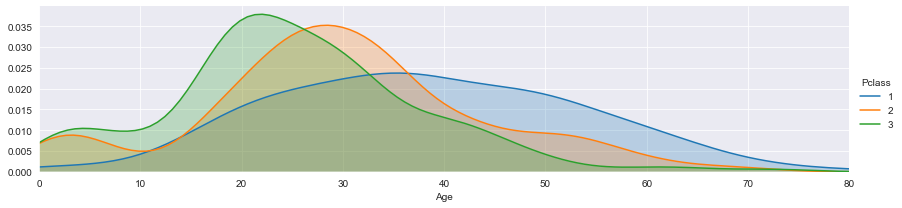

In [85]:
# Setting of the facegrid
fig= sns.FacetGrid(titanic_df, hue='Pclass', aspect=4, xlim=(0, titanic_df['Age'].max()))

# Mapping the values to plot
fig.map(sns.kdeplot, 'Age', shade=True)

# Adding the legend
fig.add_legend()

plt.show()

## 2. What deck were the passengers on? How does that relate to their class?

#### 2.1 Plot the number of passengers for every deck.

Here we want to understand how the passngers were distributed in the differents decks. In order to do that we need to the deck levels from the **"Cabin** column. We will proceed as follow:
1. Get the "Cabin" column, save it in a new variable "deck" and drop the NaN values.
2. Every "Cabin" code is composed of a letter followed by a number (e.g C89). Now you have to loop throug the new variable "deck", get the first letter from every code and save it into a list.
3. Use the new list to create a data frame of a single column.
4. Use the new dataframe to do the plot. 

1. Save the cabin column into a new variable.

In [86]:
# Droping of the null values
deck= titanic_df['Cabin'].dropna()
deck.head(3)

1     C85
3    C123
6     E46
Name: Cabin, dtype: object

2. Loop throug the new variable and get the first letter for every value.

In [87]:
# Creation of an empty list
levels=[]

# Extraction of the 
for value in deck:
    levels.append(value[0])

# Creation of a new DF

cabin_df = DataFrame(data= levels, columns=['Cabin'])
    
cabin_df.Cabin.unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

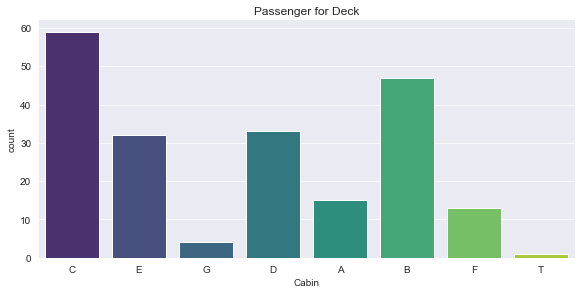

In [88]:
# plot function
sns.catplot('Cabin', data= cabin_df, kind='count', height=4, aspect=2, palette='viridis')

# plot title
plt.title("Passenger for Deck")

# show
plt.show()

#### 2.2 Plot the number of passengers for every deck divided by sex 

**Hint:** Create a new dataframe with the "Person" column from main dataset and the "one column" dataset you used at point 2.1

In [89]:
# New dataset creation
deck_df = pd.concat([titanic_df['Person'], cabin_df], axis=1)

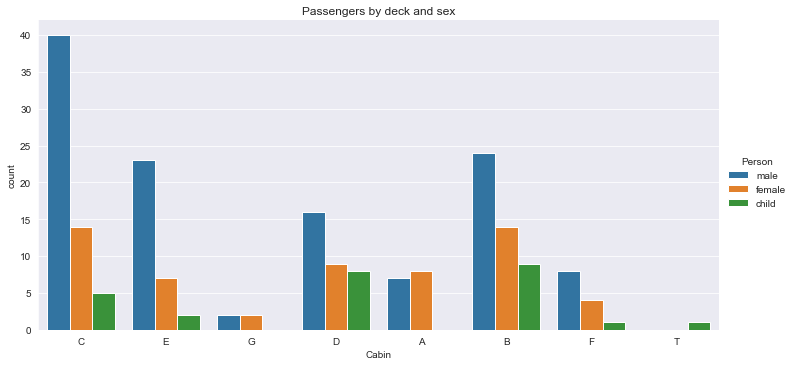

In [90]:
# plot finction
sns.catplot('Cabin',data= deck_df, hue='Person', height=5, aspect=2, kind='count')

# plt title
plt.title("Passengers by deck and sex")

# show
plt.show()

Anyway, look how in the T deck there are only child!

Nice result! Now let's answer to the third question...

## 3. Where did the passengers come from?

#### 3.1 Plot the number of passengers embarked from cities

**Hint:** If we look to the **Embarked** column we know that the letters stands for: C = Cherbourg, Q = Queenstown, S = Southampton. In this case we can create a function in order to change the letters with the entire city name.

In [91]:
# Function that change the city name
def Change_City_Name(city_code):
    code = city_code
    if code == 'S':
        return 'Southampton'
    if code == 'C':
        return 'Cherbourg'
    else:
        return 'Queenstown'
    

In [92]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [93]:
# Apply the function
titanic_df['Embarked'] = titanic_df['Embarked'].apply(Change_City_Name)

In [94]:
# show results
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,male


Plot the number of passengers embarked for every city

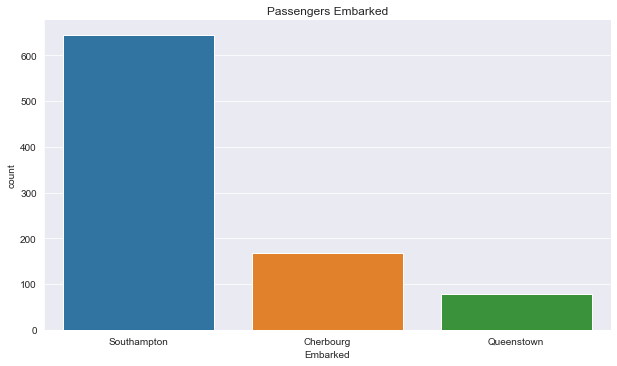

In [97]:
# plot function
sns.catplot('Embarked', data= titanic_df, kind='count', height=5, aspect=1.7)

# plot title
plt.title("Passengers Embarked")

# show
plt.show()

Nice! Most of the people were embarked from Southampton

#### 3.2 Plot the number of passengers embarked by cities and divided by class

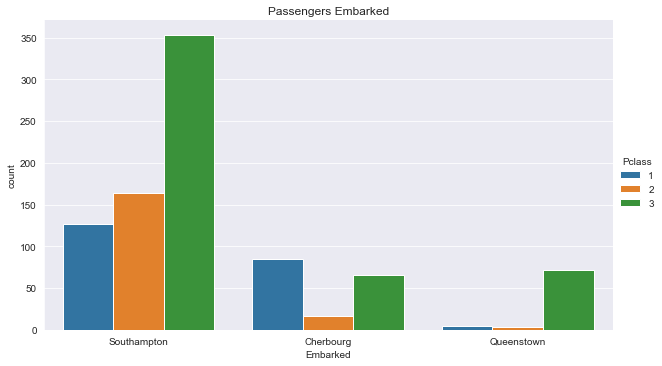

In [98]:
# plot function
sns.catplot('Embarked', data= titanic_df, kind='count', hue='Pclass', height=5, aspect=1.7)

# plot title
plt.title("Passengers Embarked")

# show
plt.show()

Well! At Southampton at lest the 50% of the embarked passengers had a third class ticket. Almost the total embarked passengers in Queenstown had the third class ticket.


## 4. Who were the passengers who traveled alone and who traveled with family?

#### 4.1 Plot the number of passengers who traveled alone and who traveled with family.

If we look to the we **SibSp** and **Parch** we can understand for every passenger if he/she traveled with some family member. Now, what we have to do is to extrapolate those information.

**Hint:** Create a new column named "travelers" and fill it with the information whether the passenger traveled alone or with family. 

In [100]:
# Creation of the function
def Alone_Family(people):
    sib, par = people
    if sib > 0:
        return 'with_family'
    if par > 0:
        return 'with_family'
    else:
        return 'alone'

In [101]:
# Apply the function
titanic_df['travelers'] = titanic_df[['SibSp', 'Parch']].apply(Alone_Family, axis=1)

In [102]:
# check the result
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,travelers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,male,with_family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,female,with_family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,female,with_family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,male,alone


Plot who traveled alone and who with family

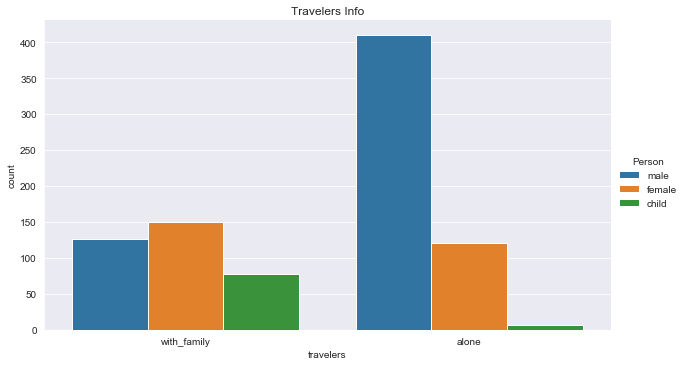

In [104]:
# plot function
sns.catplot('travelers', data= titanic_df, kind='count', height=5, aspect=1.7, hue='Person')

# plot title
plt.title("Travelers Info")

# show
plt.show()

Nice result! Here we can see that some child were traveling alone. Maybe the deck "T" that we saw in the previose plot was dedicated to those childrend.

## 5. What factors helped someone survive the sinking?

#### 5.1 Plot the number of passengers who survived and who didn't survive.

**Hint:** Create a new column named **Survivors** and fill it with **yes** if the passenger survived, with **no** if the passenger didn't survive.

In [110]:
titanic_df['Survivors'] = titanic_df.Survived.map({0:"no", 1:"yes"})

In [111]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,travelers,Survivors
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,male,with_family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,female,with_family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,female,alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,female,with_family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,male,alone,no


Plot how many passengers have survived.

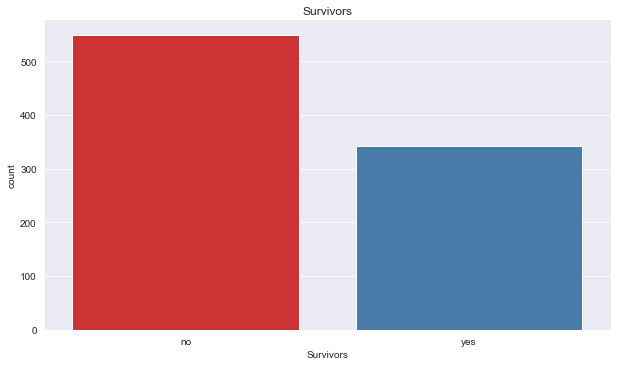

In [112]:
# plot function
sns.catplot('Survivors', data= titanic_df, kind='count', height= 5, aspect=1.7, palette='Set1')

# plt title
plt.title('Survivors')

# show
plt.show()

Let's understand if the condition to travel alone had an influence for the survival

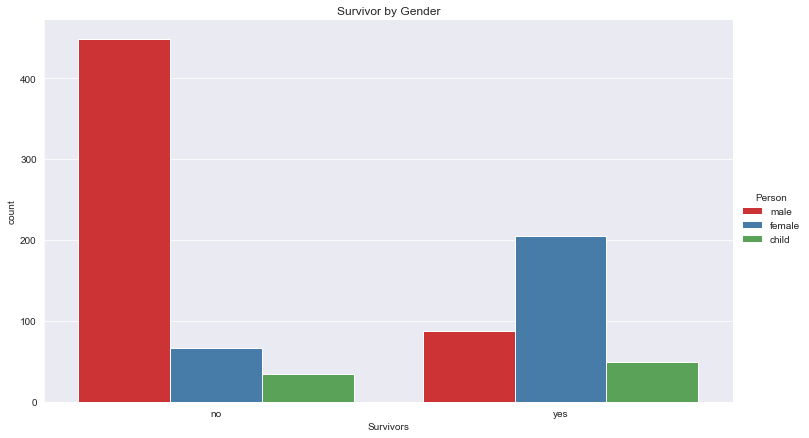

In [126]:
# plot functionfunction 
sns.catplot(x='Survivors', data= titanic_df, kind='count', hue='Person', height= 6, aspect=1.7,  palette='Set1')

# title
plt.title("Survivor by Gender")

# show
plt.show()

Woow! Look how many men who traveled alone died.

#### 5.2 Plot the rate of the passengers who survived by class

**Hint:** kind='point'

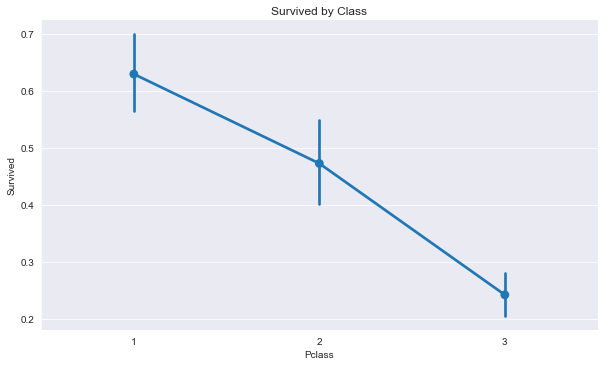

In [137]:
# plot function
sns.catplot(x='Pclass', y='Survived', data= titanic_df, kind='point', height=5, aspect=1.7)

# plot title
plt.title("Survived by Class")

# show()
plt.show()

The first class had the best rate of suvivors

#### 5.3 Plot the rate of survived passengers by class divided by sex

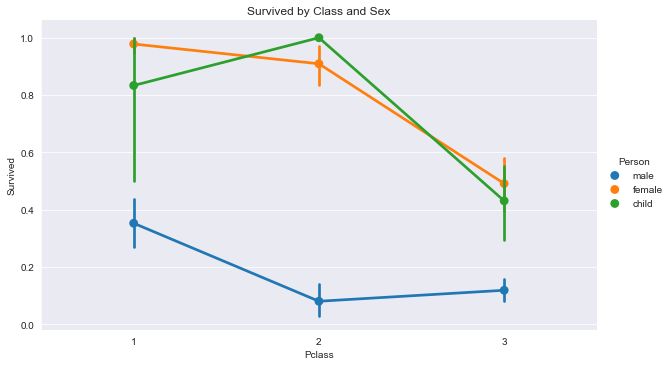

In [144]:
# Plot function
sns.catplot(x='Pclass',y='Survived', data= titanic_df, kind='point', height=5, aspect= 1.7, hue='Person')

# plot title
plt.title('Survived by Class and Sex')

# show
plt.show()

Nice! Look how the childrend of the third class had a less surviving rate compared with those of the second and first. At the same time from the plot we can see that to be man and to travel in the 2nd and 3rd class was a disadvantage.

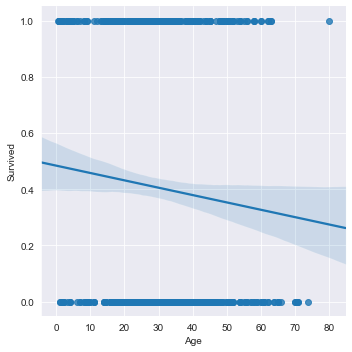

In [141]:
sns.lmplot(x='Age', y='Survived', data= titanic_df)

Looks like there is a general trend that the older the passenger was, the less likely they survived.

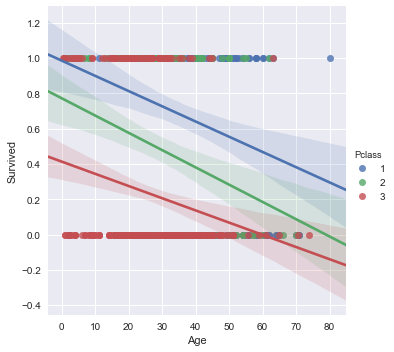

In [36]:
# Let's look if the class had some influence
sns.lmplot('Age', 'Survived', data= titanic_df, hue='Pclass')

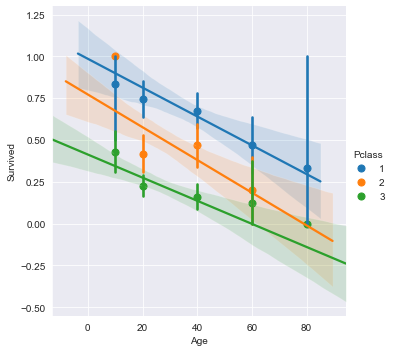

In [142]:
# For a more clear visualization
generation=[10, 20,40,60,80 ]
sns.lmplot('Age', 'Survived', data= titanic_df, hue='Pclass', x_bins= generation)

Nice! So, from the plot we can see that to be old and travel in the 3rd class was a bad condition in order to survive.

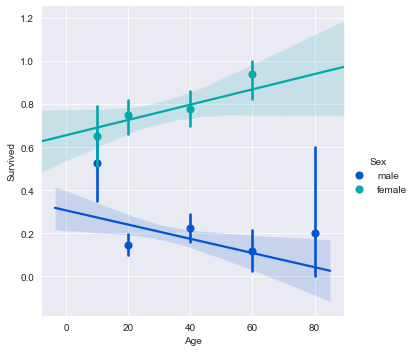

In [143]:
# Now we compare the surviving rate with the gender variable
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter', x_bins= generation)

Awesome! we've gotten some really great insights on how gender,age, and class all related to a passengers chance of survival. If we look to this last graph we can understad that to be an older female was a better chance to survive.

Now let's answer to the last two questions...

6. Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
7. Did having a family member increase the odds of surviving the crash?

# 6) Did the deck have an effect on the passengers survival rate?

In order to answer this question let's create a column for the deck level only

In [39]:
# First we drop the null values
titanic_df = titanic_df.dropna()

In [40]:
# Function to create the column with the deck letter
def colDeck (cabin):
    string = cabin
    return string[0]

In [41]:
# Set a new column
titanic_df['Deck'] = titanic_df['Cabin'].apply(colDeck)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [42]:
# Check the cration of the column
titanic_df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,travelers,Survivors,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with_family,yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with_family,yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,alone,no,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,with_family,yes,G


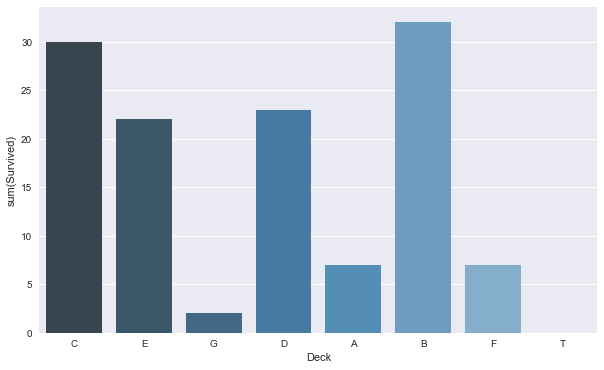

In [43]:
# Let's see how many people survived for each deck 
plt.figure(figsize=(10,6))
sns.barplot('Deck','Survived', data= titanic_df, estimator=np.sum, ci=0, palette='Blues_d')

Ok... It seems that the passengers from the "A" and "B" decks had a best chance to survive.

But let's compare the total passengers and the survivid passengers for each deck...

[<matplotlib.text.Text at 0x113bb630>, <matplotlib.text.Text at 0x1122de10>]

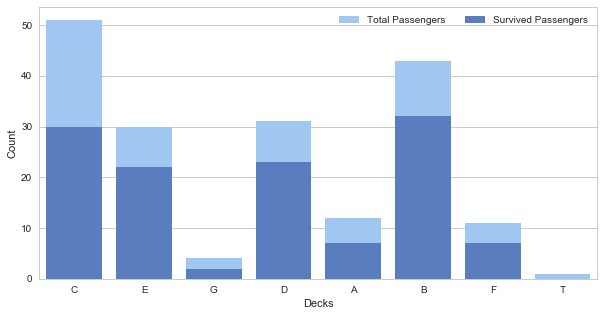

In [44]:
# Set the stile of the grid
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Plot the total passengers
sns.set_color_codes("pastel")
sns.barplot('Deck','PassengerId', data= titanic_df, ci=0, estimator=np.count_nonzero, color='b', label='Total Passengers')

# Plot the survived
sns.set_color_codes("muted")
sns.barplot('Deck','Survived', data= titanic_df, estimator=np.sum, ci=0, color='b', label= 'Survived Passengers')

# The legend
ax.legend(ncol=2, loc="upper right")
ax.set(ylabel="Count",  xlabel="Decks")
#sns.despine(left=True, bottom=False)

Woow! What a nice view! Her we can understand better how many people died for each deck

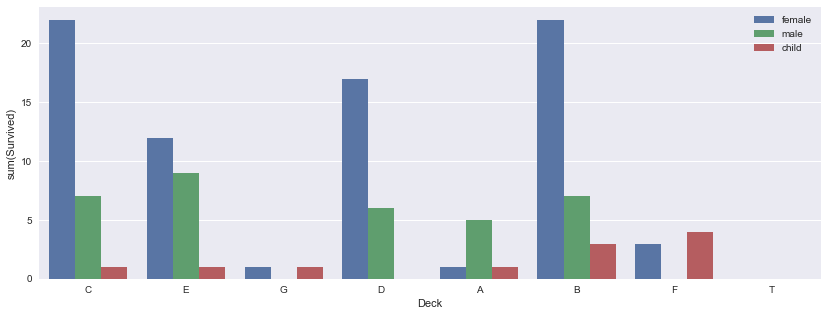

In [45]:
# Now let's see the survivor for every deck in relation of the gender
sns.set(style="darkgrid")
plt.figure(figsize=(14, 5))
sns.barplot('Deck','Survived', data= titanic_df, estimator=np.sum, ci=0, hue='Person')
plt.legend(ncol=1, loc="upper right")

# 7) Did having a family member increase the odds of surviving the crash?

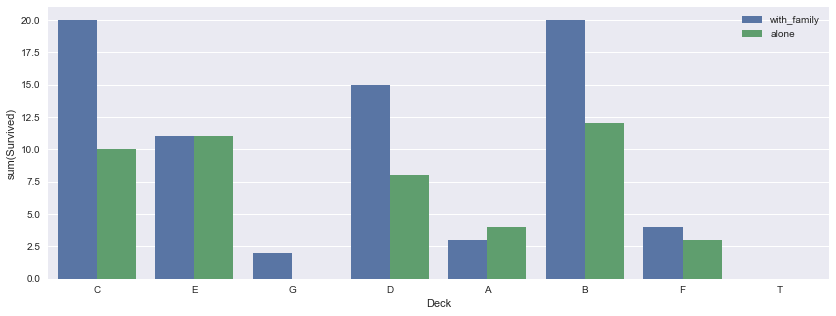

In [46]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 5))
sns.barplot('Deck','Survived', data= titanic_df, estimator=np.sum, ci=0, hue='travelers')
plt.legend(ncol=1 , loc='upper right')

Well it seems that the people who were traveling with the family had a more chance to survive

# Thanks for your attention!